Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

**2.--** Compute e imprima el número de registros con datos faltantes.

**3.--** Compute e imprima el número de registros duplicados.

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

**5.--** Compute y grafique el precio primedio diario.

**6.--** Compute y grafique el precio máximo por mes.

**7.--** Compute y grafique el precio mínimo mensual.

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime

In [2]:
def leer_precios(filename):
    for k in range(10):
        df = pd.read_excel(filename,
                           skiprows = k,
                           usecols = list(range(26)))
        if df.iloc[0,0] == 'Fecha':
            df = pd.read_excel(filename,
                               skiprows = k+1,
                               usecols = list(range(26)))
            break
        
    return(df)

# Punto 1

In [3]:
filenames = !ls precios/*.xls*
dfs = []
for filename in filenames:
    dfs.append(leer_precios(filename))

df =[]
df= pd.concat(dfs, sort=True)
df = df.loc[:,:'Fecha']
df = pd.melt(df, id_vars =['Fecha'],var_name='Hora',value_name='Precio') 
#df['Fecha'] = df['Fecha'].str[:10]
df['Fecha'] = pd.to_datetime(df['Fecha'])
#df['Fecha2'] = df['Fecha'].dt.date
#df[df['Fecha2']==datetime.date(1996,12,12)]
df.count()





    


Fecha     201600
Hora      201816
Precio    201578
dtype: int64

# Punto 2

In [4]:
df.isna().sum()

Fecha     216
Hora        0
Precio    238
dtype: int64

# Punto 3


In [5]:
duplicados = len(df.index)-len(df.drop_duplicates())
duplicados 

1951

# Punto 4

In [6]:
df = df.dropna()
df = df.drop_duplicates()
df.to_csv('datoss.csv')
completos = len(df)
completos


199819

# Punto 5

In [7]:
df2 = df.copy()
#df2['Dia'] = df2['Fecha'].str[8:11]
df2['Dia'] = df2.Fecha.dt.strftime('%d')
df2 = df2.groupby('Dia')['Precio'].mean()
df2

Dia
01    107.854329
02    108.913259
03    110.298928
04    111.968630
05    111.388790
06    111.712212
07    111.188443
08    110.057708
09    108.712296
10    105.800706
11    106.111738
12    106.914213
13    107.512270
14    108.276894
15    107.808577
16    108.689072
17    107.165993
18    107.465735
19    105.367401
20    104.312990
21    105.067687
22    105.324493
23    106.490087
24    106.689323
25    106.817565
26    106.574071
27    106.083161
28    106.621820
29    106.125771
30    104.633796
31    101.803295
Name: Precio, dtype: float64

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 7 Text xticklabel objects>)

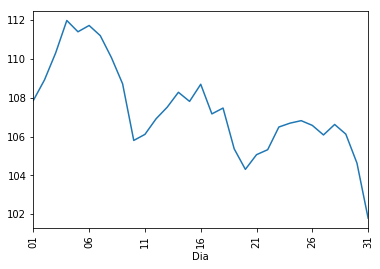

In [8]:
df2.plot.line()
plt.xticks(rotation='vertical')

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 7 Text xticklabel objects>)

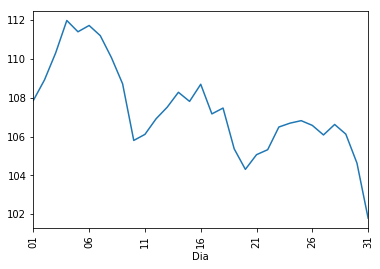

In [9]:
df2.plot.line()
plt.xticks(rotation='vertical')

# Punto 6

In [10]:
df2 = df.copy()
df2['Mes'] = df2.Fecha.dt.strftime('%m')
df2 = df2.groupby('Mes')['Precio'].max()
df2


Mes
01     865.477082
02     869.442024
03     884.836657
04     807.500399
05     686.494571
06     474.110743
07     445.329386
08     441.242919
09    1495.042973
10    2821.520551
11     823.069323
12     840.227945
Name: Precio, dtype: float64

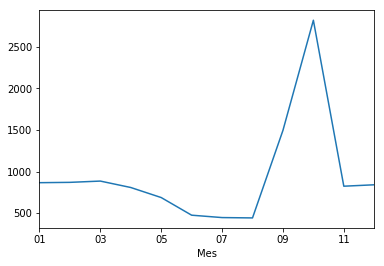

In [11]:
df2.plot.line()


# Punto 7

In [12]:
df2 = df.copy()
df2['Mes'] = df2.Fecha.dt.strftime('%m')
df2 = df2.groupby('Mes')['Precio'].min()
df2

Mes
01    1.073
02    1.076
03    1.255
04    1.254
05    0.000
06    0.000
07    0.000
08    0.000
09    1.073
10    0.000
11    1.072
12    1.074
Name: Precio, dtype: float64

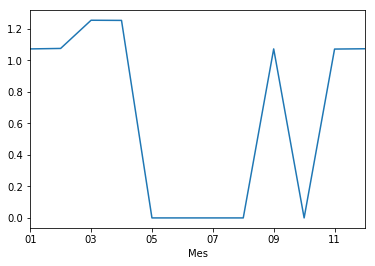

In [13]:
df2.plot.line()

# Punto 8


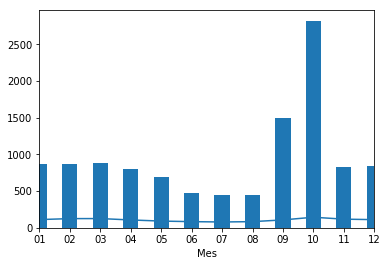

In [15]:
df2 = df.copy()
df2['Mes'] = df2.Fecha.dt.strftime('%m')
df3 = df2.groupby('Mes')['Precio'].max()
df4 = df2.groupby('Mes')['Precio'].mean()
df3.plot.bar()
df4.plot.line()

# Punto 9


In [16]:
df2 = df.copy()
df2['day_of_week'] = df2['Fecha'].dt.day_name()
#df3 = df2.groupby('Fecha').max()
df2['Max'] = df2.groupby(['Fecha'])['Precio'].transform('max')
df2

,Fecha,Hora,Precio,day_of_week,Max
1,1995-07-21,0,1.073000,Friday,16.670000
2,1995-07-22,0,1.073000,Saturday,2.500000
3,1995-07-23,0,1.073000,Sunday,1.238000
4,1995-07-24,0,1.000000,Monday,22.500000
5,1995-07-25,0,0.990000,Tuesday,1.500000
6,1995-07-26,0,0.500000,Wednesday,8.000000
7,1995-07-27,0,0.500000,Thursday,1.500000
8,1995-07-28,0,0.000000,Friday,1.073000
9,1995-07-29,0,1.000000,Saturday,1.072000
10,1995-07-30,0,1.072000,Sunday,1.073000


In [17]:
#df2[(df2['Fecha'] == '2018-05-05') & (df2['Precio'] == df2['Max'])]
df3 = df2[(df2['day_of_week'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) & (df2['Precio'] == df2['Max'])]
df3['Hora'] = df3['Hora'].astype(str).astype(int)
df3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Fecha,Hora,Precio,day_of_week,Max
32,1995-08-21,0,2.000000,Monday,2.000000
137,1995-12-04,0,160.001000,Monday,160.001000
349,1996-07-03,0,1.255000,Wednesday,1.255000
543,1997-01-01,0,36.726270,Wednesday,36.726270
866,1997-11-20,0,134.487200,Thursday,134.487200
1049,1998-05-22,0,32.747660,Friday,32.747660
1153,1998-09-03,0,24.967400,Thursday,24.967400
1165,1998-09-15,0,26.767400,Tuesday,26.767400
1175,1998-09-25,0,21.817400,Friday,21.817400
1193,1998-10-13,0,21.216820,Tuesday,21.216820


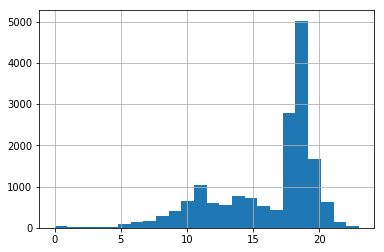

In [18]:
df3['Hora'].hist(bins=24)

# Punto 10

In [19]:
df2 = df.copy()
df2['day_of_week'] = df2['Fecha'].dt.day_name()
#df3 = df2.groupby('Fecha').max()
df2['Max'] = df2.groupby(['Fecha'])['Precio'].transform('max')
df3 = df2[(df2['day_of_week'] == 'Saturday') & (df2['Precio'] == df2['Max'])]
df3['Hora'] = df3['Hora'].astype(str).astype(int)
df3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Fecha,Hora,Precio,day_of_week,Max
72,1995-09-30,0,15.000000,Saturday,15.000000
450,1996-10-12,0,2.000000,Saturday,2.000000
700,1997-06-07,0,47.676830,Saturday,47.676830
889,1997-12-13,0,144.499750,Saturday,144.499750
1071,1998-06-13,0,18.482240,Saturday,18.482240
1380,1999-03-27,0,20.270530,Saturday,20.270530
1422,1999-05-08,0,23.596410,Saturday,23.596410
1527,1999-08-21,0,30.409800,Saturday,30.409800
1653,1999-12-25,0,29.176620,Saturday,29.176620
1669,2000-01-01,0,46.284788,Saturday,46.284788


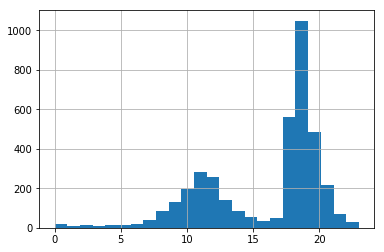

In [20]:
df3['Hora'].hist(bins=24)

# Punto 11

In [21]:
df2 = df.copy()
df2['day_of_week'] = df2['Fecha'].dt.day_name()
#df3 = df2.groupby('Fecha').max()
df2['Max'] = df2.groupby(['Fecha'])['Precio'].transform('max')
df3 = df2[(df2['day_of_week'] == 'Sunday') & (df2['Precio'] == df2['Max'])]
df3['Hora'] = df3['Hora'].astype(str).astype(int)
df3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Fecha,Hora,Precio,day_of_week,Max
136,1995-12-03,0,130.001000,Sunday,130.001000
143,1995-12-10,0,172.660000,Sunday,172.660000
241,1996-03-17,0,1.900000,Sunday,1.900000
255,1996-03-31,0,2.700000,Sunday,2.700000
311,1996-05-26,0,1.300000,Sunday,1.300000
325,1996-06-09,0,1.256000,Sunday,1.256000
360,1996-07-14,0,1.254000,Sunday,1.254000
416,1996-09-08,0,3.000000,Sunday,3.000000
430,1996-09-22,0,24.000000,Sunday,24.000000
528,1996-12-29,0,37.000000,Sunday,37.000000


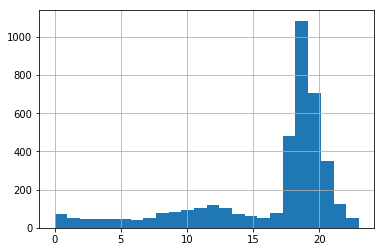

In [22]:
df3['Hora'].hist(bins=24)

# Punto 12

In [23]:
df2 = df.copy()
df2['Year'] = df2['Fecha'].dt.strftime('%Y')
df2['Min'] = df2.groupby(['Year'])['Precio'].transform('min')
df2

,Fecha,Hora,Precio,Year,Min
1,1995-07-21,0,1.073000,1995,0.000000
2,1995-07-22,0,1.073000,1995,0.000000
3,1995-07-23,0,1.073000,1995,0.000000
4,1995-07-24,0,1.000000,1995,0.000000
5,1995-07-25,0,0.990000,1995,0.000000
6,1995-07-26,0,0.500000,1995,0.000000
7,1995-07-27,0,0.500000,1995,0.000000
8,1995-07-28,0,0.000000,1995,0.000000
9,1995-07-29,0,1.000000,1995,0.000000
10,1995-07-30,0,1.072000,1995,0.000000


In [24]:
df3 = df2[(df2['Precio'] == df2['Min'])]
df3[['Year','Fecha','Min']].sort_values('Year')

,Year,Fecha,Min
8,1995,1995-07-28,0.000000
134554,1995,1995-07-30,0.000000
134552,1995,1995-07-28,0.000000
75692,1995,1995-07-31,0.000000
75693,1995,1995-08-01,0.000000
176601,1995,1995-08-01,0.000000
176600,1995,1995-07-31,0.000000
151370,1995,1995-07-28,0.000000
151372,1995,1995-07-30,0.000000
151373,1995,1995-07-31,0.000000


# Punto 13

In [25]:
df2 = df.copy()
df2['Mes'] = df2['Fecha'].dt.strftime('%m')
df2['Dia'] = df2['Fecha'].dt.strftime('%d')
df2['Dia_mean'] = df2.groupby(['Dia'])['Precio'].transform('mean')
df2['Mes_mean'] = df2.groupby(['Mes'])['Precio'].transform('mean')
df2


,Fecha,Hora,Precio,Mes,Dia,Dia_mean,Mes_mean
1,1995-07-21,0,1.073000,07,21,105.067687,79.269063
2,1995-07-22,0,1.073000,07,22,105.324493,79.269063
3,1995-07-23,0,1.073000,07,23,106.490087,79.269063
4,1995-07-24,0,1.000000,07,24,106.689323,79.269063
5,1995-07-25,0,0.990000,07,25,106.817565,79.269063
6,1995-07-26,0,0.500000,07,26,106.574071,79.269063
7,1995-07-27,0,0.500000,07,27,106.083161,79.269063
8,1995-07-28,0,0.000000,07,28,106.621820,79.269063
9,1995-07-29,0,1.000000,07,29,106.125771,79.269063
10,1995-07-30,0,1.072000,07,30,104.633796,79.269063


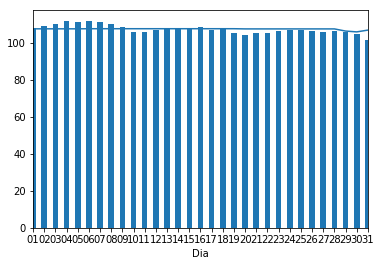

In [30]:
df3 = df2.groupby('Dia')['Dia_mean'].mean()
df4 = df2.groupby('Dia')['Mes_mean'].mean()
df3.plot.bar()
df4.plot.line()

